## PyTorch Tutorial

Based on: https://docs.pytorch.org/tutorials/beginner/pytorch_with_examples.html

- **Problem:** Fit a third-order polynomial $a + b x + c x^2 + d  x^3$ to the sine function $y = \sin(x)$.

- **Method:** Use gradient descent to train the four parameters $(a, b, c, d)$ by minimizing the Euclidean distance between the predicted and true outputs.

- **Warm-up:** First, the problem will be solved using NumPy to manually implement the forward and backward passes.
    - NumPy is a general scientific computing library and is not specialized for deep learning or computation graphs.

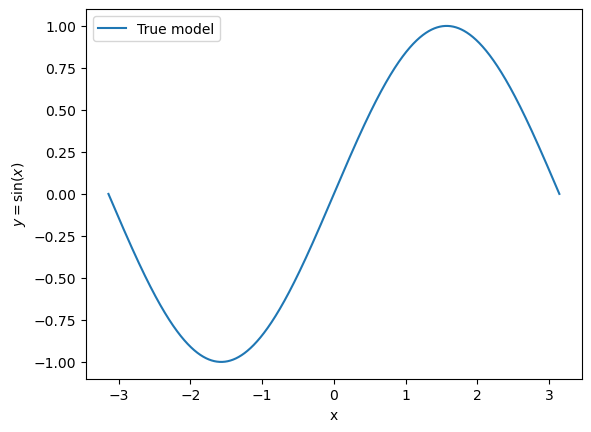

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math


# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label="True model")
ax.set(xlabel="x", ylabel=r"$y=\sin(x)$")
ax.legend()
plt.show()

99 351.9546293023578
199 243.2109609985039
299 169.11337998070195
399 118.56595199210318
499 84.04431651518736
599 60.4404832140803
699 44.28302442762447
799 33.21010257700442
899 25.612995448518156
999 20.3947060865004
1099 16.80633033905779
1199 14.33601490899849
1299 12.633521136084262
1399 11.458920605511139
1499 10.64766369882959
1599 10.086768975947635
1699 9.69857441466709
1799 9.429636267714006
1899 9.243136047013959
1999 9.11368104078327
Result: y = 0.015924627096603756 + 0.8648839705814495 x + -0.002747263161102835 x^2 + -0.09448867801758598 x^3


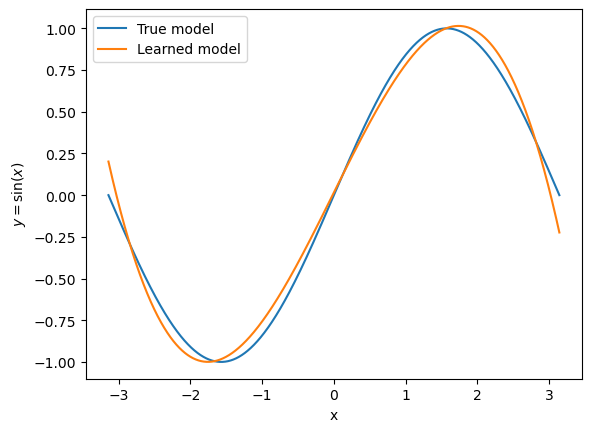

In [2]:
# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x** 2 + d * x** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

# Plot prediction
y_pred = a + b * x + c * x ** 2 + d * x ** 3

fig, ax = plt.subplots()
ax.plot(x, y, label="True model")
ax.plot(x, y_pred, label="Learned model")
ax.set(xlabel="x", ylabel=r"$y=\sin(x)$")
ax.legend()
plt.show()

### PyTorch: Tensors


- **NumPy's Limitation**: NumPy cannot use GPUs, which makes it too slow for modern deep learning where GPUs offer significant speedups (50x or more).

- **PyTorch's Solution: The Tensor:**
    - A PyTorch Tensor is conceptually the same as a NumPy array (an n-dimensional array).
    - Unlike NumPy, Tensors can run on GPUs for accelerated computation.
    - They can also automatically track a computational graph and gradients.

- **Next Step:** We will now use PyTorch Tensors to solve the same problem, still requiring the manual implementation of the forward and backward passes.

In [ ]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

# Plot prediction
y_pred = a + b * x + c * x ** 2 + d * x ** 3

fig, ax = plt.subplots()
ax.plot(x, y, label="True model")
ax.plot(x, y_pred, label="Learned model")
ax.set(xlabel="x", ylabel=r"$y=\sin(x)$")
ax.legend()
plt.show()

### PyTorch: Tensors and autograd

- **Problem:** Manually implementing the backward pass for calculating gradients is simple for small networks but becomes very difficult for large, complex ones.

- **Solution:** PyTorch's `autograd` package automates the calculation of gradients.

- **How it Works:**
    - The forward pass defines a computational graph where Tensors are the nodes.
    - `autograd` uses this graph to automatically compute gradients during backpropagation.

- **Usage:**
    - If a Tensor `x` has `x.requires_grad=True`, its gradient is stored in `x.grad`.

- **Next Step:** Revisit the polynomial fitting example using autograd, which eliminates the need to manually code the backward pass.

In [ ]:
import torch
import math

# We want to be able to train our model on an `accelerator <https://pytorch.org/docs/stable/torch.html#accelerators>`__
# such as CUDA, MPS, MTIA, or XPU. If the current accelerator is available, we will use it. Otherwise, we use the CPU.

dtype = torch.float
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

### PyTorch: nn

- **Problem:** Using raw `autograd` can be too low-level and cumbersome for building large neural networks.

- **Common Abstraction:** Neural networks are usually constructed by arranging computations into layers, which contain learnable parameters.

- **PyTorch's Solution:** The `nn` package provides a high-level abstraction for building networks, similar to Keras in TensorFlow.

- **Key Features of `nn`:**
    - It provides `Modules`, which act as neural network layers.
    - A `Module` can hold state, including learnable parameters.
    - The package also includes a library of common loss functions.

- **Next Step:** Implement the polynomial model using the higher-level abstractions from the `nn` package.

In [ ]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + \
{linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

### PyTorch: optim

- **Problem:** Manually updating model weights is simple for basic stochastic gradient descent but is impractical for more advanced optimizers like Adam, AdaGrad, or RMSProp.

- **Solution:** The `optim` package in PyTorch provides implementations of many common optimization algorithms.

- **Function:** It abstracts the weight update process, allowing you to easily use sophisticated optimizers.

- **Next Step:** We will now train the `nn` model using the `RMSprop` algorithm from the `optim` package instead of updating weights manually.

99 17988.4609375
199 7159.85693359375
299 2506.45068359375
399 898.4400634765625
499 547.9037475585938
599 466.63525390625
699 400.0572204589844
799 328.1712951660156
899 253.70571899414062
999 183.341064453125
1099 123.20922088623047
1199 76.49676513671875
1299 43.630245208740234
1399 23.316930770874023
1499 13.108946800231934
1599 10.28701114654541
1699 8.874062538146973
1799 8.839604377746582
1899 8.887767791748047
1999 8.970453262329102
Result: y = -0.0005388405406847596 + 0.8561827540397644 x + -0.0005393523606471717 x^2 + -0.09396769851446152 x^3


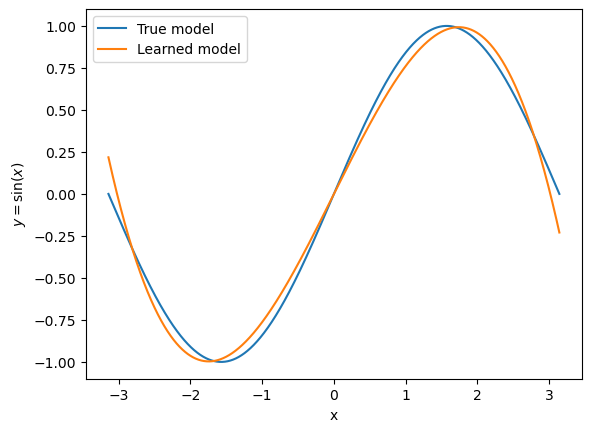

In [3]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + \
{linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# Plot prediction
y_pred = linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
linear_layer.weight[:, 1].item() * x**2 + linear_layer.weight[:, 2].item() * x**3

fig, ax = plt.subplots()
ax.plot(x, y, label="True model")
ax.plot(x, y_pred, label="Learned model")
ax.set(xlabel="x", ylabel=r"$y=\sin(x)$")
ax.legend()
plt.show()

### Exercises and further reading

https://www.learnpytorch.io

https://docs.pytorch.org/tutorials/